# Task 4: HDR Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("memorial.hdr")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.shape

(768, 512, 3)

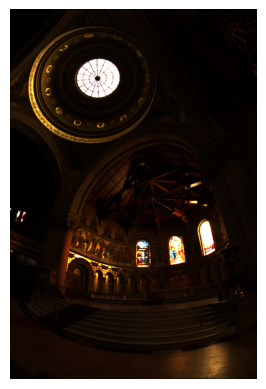

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
plt.imsave("memorial_original.png", img)

In [6]:
imgArray = img.astype(np.float64)
print(imgArray)

[[[ 0.  0.  0.]
  [ 2.  0.  0.]
  [ 3.  1.  0.]
  ...
  [ 8.  4.  1.]
  [11.  5.  1.]
  [ 7.  4.  1.]]

 [[ 2.  0.  0.]
  [ 2.  1.  0.]
  [ 3.  1.  0.]
  ...
  [ 7.  3.  1.]
  [ 8.  5.  1.]
  [ 7.  4.  1.]]

 [[ 3.  0.  0.]
  [ 3.  1.  0.]
  [ 2.  1.  0.]
  ...
  [ 9.  3.  1.]
  [ 8.  4.  1.]
  [ 7.  5.  1.]]

 ...

 [[ 2.  1.  0.]
  [ 3.  1.  0.]
  [ 3.  1.  0.]
  ...
  [18.  9.  3.]
  [17.  8.  2.]
  [12.  7.  2.]]

 [[ 2.  1.  0.]
  [ 3.  1.  0.]
  [ 3.  1.  0.]
  ...
  [12.  6.  3.]
  [12.  6.  2.]
  [ 9.  5.  2.]]

 [[ 2.  1.  0.]
  [ 3.  1.  0.]
  [ 3.  1.  0.]
  ...
  [ 9.  5.  2.]
  [ 9.  6.  2.]
  [ 7.  4.  1.]]]


In [7]:
# imgArray = imgArray.flatten()
# print(imgArray)
# imgArray.shape

In [8]:
# indX = list(range(len(imgArray)))
# indX.sort(key=lambda i: imgArray[i])
# print(indX)

In [9]:
final = np.zeros_like(imgArray, dtype=np.float64)
for ch in range(imgArray.shape[2]):
    flatImg = imgArray[:, :, ch].flatten()
    
    indX = list(range(len(flatImg)))
    indX.sort(key=lambda i: flatImg[i])
    
    cdf = np.zeros_like(flatImg, dtype=np.float64)
    for pos, pixel in enumerate(indX):
        cdf[pixel] = pos/(len(flatImg)-1)

    a = 0
    b = 255
    cdf = a + (b-a)*cdf
    cdf = cdf.reshape(imgArray.shape[:2])
    
    final[:, :, ch] = cdf
    

# for pos, pixel in enumerate(indX):
#     cdf[pixel] = pos/(len(imgArray)-1) 

In [10]:
# a = 0
# b = 255
# cdf += a
# cdf *= (b-a)

In [11]:
# cdf = cdf.reshape(img.shape)

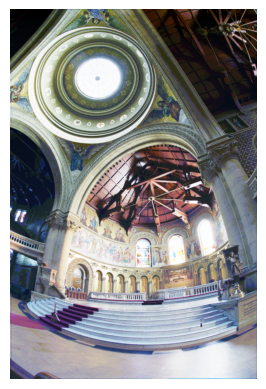

In [12]:
final = final/255.0
plt.imshow(final)
plt.axis('off')
plt.show()

In [13]:
plt.imsave("memorial_equalized.png", final)